In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R = 1.9858775 * 10**-3     # universal gas (kcal / mol K)

In [3]:
# from https://doi.org/10.1002/advs.202001670 for SWCNTs with average diameter 1.7 nm

cnt_diameter = 1.7 # nm
act_cnt_pack_density = 1.9*10**12 # paths/cm^2
theor_cnt_pack_density = 1 / np.pi / (cnt_diameter/2)**2 # paths/nm^2
theor_cnt_pack_density *= (10**9 / 10**2)**2 # paths/cm^2

act_theor_ratio = act_cnt_pack_density / theor_cnt_pack_density
print(f'{act_theor_ratio:.4f} : ratio of actual/theoretical CNT packing density')

0.0431 : ratio of actual/theoretical CNT packing density


In [5]:
# calculate theoretical packing density for 0.5 nm diameter CNT and scale for actual packing

cnt_diameter = 0.5 # nm
theor_cnt_pack_density = 1 / np.pi / (cnt_diameter/2)**2 # paths/nm^2
theor_cnt_pack_density *= (10**9 / 10**2)**2 # paths/cm^2

act_cnt_pack_density = theor_cnt_pack_density * act_theor_ratio # paths/cm^2
print(f'{act_cnt_pack_density:.4e} paths/cm^2')
act_cnt_pack_density *= (10**2 / 10**9)**2 # paths/nm^2
print(f'{act_cnt_pack_density:.4f} paths/nm^2 : actual CNT packing density for CNTs with diameter 0.5 nm')

2.1964e+13 paths/cm^2
0.2196 paths/nm^2 : actual CNT packing density for CNTs with diameter 0.5 nm


In [6]:
# assume an order of magnitude worse packing density for PA membrane with pore diameter 0.5 nm

act_PA_pack_density = act_cnt_pack_density / 10
print(f'{act_PA_pack_density:.4f} paths/nm^2 : calculated actual PA packing density for pores with diameter 0.5 nm')

0.0220 paths/nm^2 : calculated actual PA packing density for pores with diameter 0.5 nm


In [8]:
# let unit area be 0.1 micrometer squared

unit_area = 0.1 * (10**9 / 10**6)**2 # um^2 to nm^2
n_paths = round(act_PA_pack_density*unit_area)
print(f'{n_paths} : number of paths in {unit_area:,.2f} nm^2')

2196 : number of paths in 100,000.00 nm^2


In [9]:
# calculate area of one path (Angstroms^2)

A_i = np.pi*2.5**2
print(f'{A_i:.4f} Angstroms^2 : area for a single path')

print(f'\n{A_i*2000:.4f} Angstroms^2 : total available area for transport')

print(f'\n{unit_area * (10 / 1)**2:.4e} Angstroms^2 : total membrane area')

print(f'\n{A_i*2000 / (unit_area * (10 / 1)**2)} Angstroms^2 : available fraction of total area')

19.6350 Angstroms^2 : area for a single path

39269.9082 Angstroms^2 : total available area for transport

1.0000e+07 Angstroms^2 : total membrane area

0.003926990816987242 Angstroms^2 : available fraction of total area


In [23]:
# calculate the entropic shift for 2000 paths of equal area A_i across 1e7 Angstroms^2 total area

n_paths_list = np.arange(1, 2001, 1)
dS = np.zeros(len(n_paths_list))
for i,n in enumerate(n_paths_list):
    dS[i] = -R*300*np.log(n*A_i/(unit_area * (10 / 1)**2))

print(f'Entropic shift for {n_paths_list[-1]} paths : {dS[-1]:.4f} kcal/mol/K')

Entropic shift for 2000 paths : 3.3005 kcal/mol/K


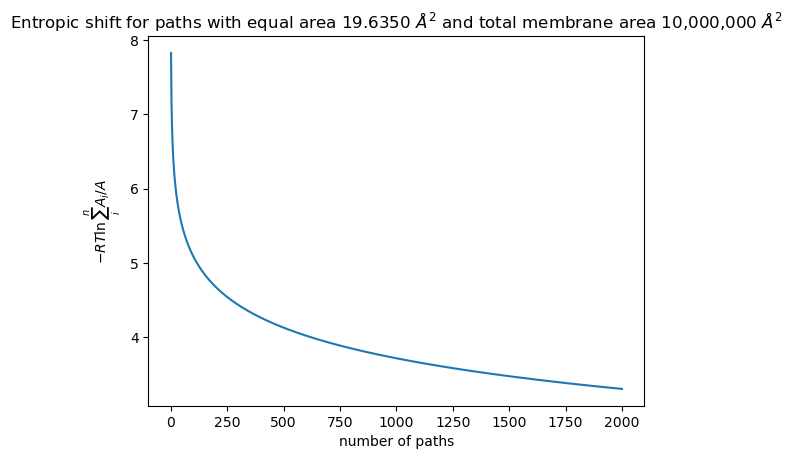

In [26]:
plt.plot(n_paths_list, dS)
plt.xlabel('number of paths')
plt.ylabel('$-RT \ln{\sum_i^n A_i / A}$')
plt.title(f'Entropic shift for paths with equal area {A_i:.4f} $\AA^2$ and total membrane area {unit_area * (10 / 1)**2:,.0f} $\AA^2$')
plt.savefig('figs/entropic_shift.png')